# Import required libraries

In [3]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import init_notebook_mode,plot, iplot
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
import os

Connecting Pandas to Plotly. We are using Plotly offline.

In [4]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

# Load the dataset

In [5]:
iris=pd.read_csv('iris.data', skiprows=1, header=None)
iris.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
iris.shape

(149, 5)

Ignoring the index, we have four independent variables (x1 = sepal_length, x2 = sepal_width, x3 = petal_length, x4 = petal_width) and one dependent variable (y), which is the species.

**NOTE**: Column axis = 1, Row axis = 0

# Visualise the data

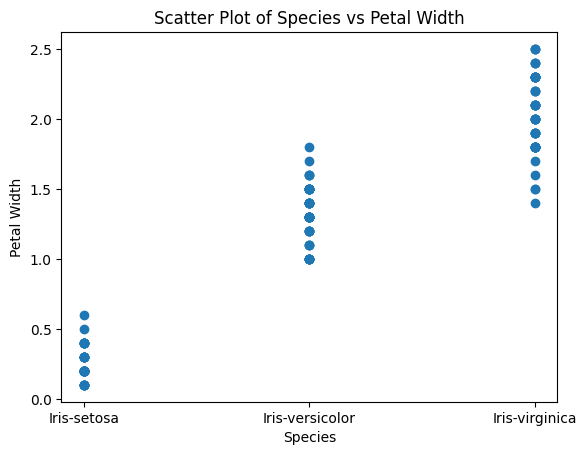

In [8]:
plt.scatter(iris['species'], iris['petal_width'])
plt.xlabel('Species')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Species vs Petal Width')
plt.show()

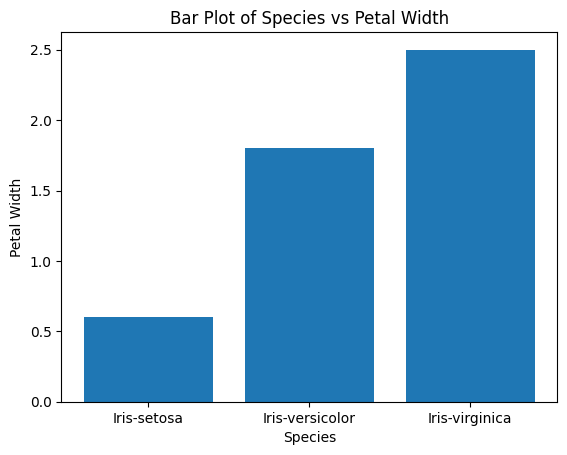

In [9]:
plt.bar(iris['species'], iris['petal_width'])
plt.xlabel('Species')
plt.ylabel('Petal Width')
plt.title('Bar Plot of Species vs Petal Width')
plt.show()

In [10]:
px.line(iris, x='species', y='petal_width')

In [11]:
px.scatter(iris, x='species', y='petal_width')

In [12]:
px.bar(iris, x='species', y='petal_width')

In [13]:
px.scatter_matrix(iris, color='species', title='iris', dimensions=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Decision Tree

**DATA PREPROCESSING**

Separating the independent variables (all four into one variable 'x') from the target variable 'y':

In [14]:
x = iris.drop(['species'], axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [15]:
y = iris['species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: species, Length: 149, dtype: object

Label Encoding: Converting labels into numerical form so that it is understood by the machine learning model. In this project, the labels , 'Iris-setosa', 'Iris-versicolor', and 'Iris-virginica', have been converted to 0, 1, and 2 respectively.

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #creating an instance of LabelEncoder clss
y = le.fit_transform(y) #fit_transform() method to fit the encoder to your categorical data and transform it into numerical labels.
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The labels for _x_ have been discarded and the table has been replaced by a numpy array.

In [17]:
x = np.array(x)
x

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3

Splitting dataset for training and testing

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) #test_size=0.3 allocates 30% of the data to the testing set and random_state=0 ensures reproducibility of the split. Using a constant integer here means you'll get the same split each time you run the code.

**NOTE:** `random_state=0` or *any* integer means that when we run this code snippet, the training and testing sets allocated will always remain the same, whereas if `random_state=none`, the training and testing set distributions will always be different on every run.

In [19]:
print(f'Size of x = {x.shape}')
print(f'Size of x_train = {x_train.shape}')
print(f'Size of x_test = {x_test.shape}')
print(f'Size of y = {y.shape}')
print(f'Size of y_train = {y_train.shape}')
print(f'Size of y_test = {y_test.shape}')

Size of x = (149, 4)
Size of x_train = (104, 4)
Size of x_test = (45, 4)
Size of y = (149,)
Size of y_train = (104,)
Size of y_test = (45,)


**TRAIN THE DECISION TREE MODEL**

In [20]:
from sklearn import tree
DT = tree.DecisionTreeClassifier() #DecisionTreeClassifier is used for classification problems while DecisionTreeRegressor is used for regression problems
DT.fit(x_train, y_train)

DecisionTreeClassifier()

**PREDICTION (TESTING) USING THE MODEL**

In [21]:
prediction_DT = DT.predict(x_test)
prediction_DT
accuracy_DT = accuracy_score(y_test, prediction_DT)*100
print(f'Accuracy of Decision Tree = {accuracy_DT}%')

Accuracy of Decision Tree = 88.88888888888889%


Comparing y_test and prediction_DT (predicted y)

In [22]:
print(y_test)
print(prediction_DT)

[2 2 1 1 0 2 2 1 2 1 0 0 1 0 0 2 2 1 0 0 0 0 1 0 1 1 1 0 0 2 0 1 1 1 0 2 2
 1 1 0 2 0 1 2 2]
[1 2 1 1 0 2 2 1 1 1 0 0 1 0 0 1 2 1 0 0 0 0 1 0 1 1 1 0 0 2 0 1 1 2 0 1 2
 1 1 0 2 0 1 2 2]


Visualising the decision tree

> After downloading GraphViz in the bin and importing it, we export a decision tree model (`DT`) into a DOT language representation using the `export_graphviz` function from the `tree` module (likely from `sklearn`).
`out_file=None`: Specifies that the DOT data should be returned as a string instead of being written to a file.
`feature_names=iris.columns[:-1]`: Provides the names of the features used in the decision tree, likely from an Iris dataset.
`class_names=iris['species'].unique()`: Provides the names of the target classes in the decision tree.
`filled=True`: Instructs the visualization to fill the nodes with colors based on their class.
`rounded=True:` Instructs the visualization to use rounded corners for the nodes.

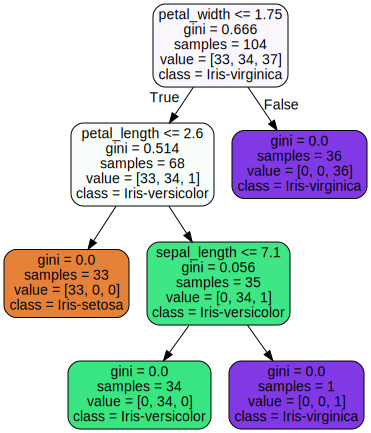

In [23]:
#Visualising the graph
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz

#Visualising the decision tree
dot_data = tree.export_graphviz(DT, out_file=None, feature_names=iris.columns[:-1], class_names=iris['species'].unique(), filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

Predicting the model outcome using random data

In [24]:
category = ['iris-setosa', 'iris-versicolor', 'iris-virginica']
x_DT = np.array([1, 1, 1, 1])
x_DT = x_DT.reshape(1, -1) #Reshapes the x_DT array to have a single row and an automatically calculated number of columns (-1 indicates that NumPy should infer the number of columns based on the number of elements). This reshaping is often necessary to match the expected input format of machine learning models, which typically expect a 2D array where each row represents a sample and each column represents a feature.
x_DT_prediction = DT.predict(x_DT)
x_DT_prediction[0]
print(f'The species of the flower is {category[x_DT_prediction[0]]}')

The species of the flower is iris-setosa


# K-Nearest Neighbors

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_std, y_train)

KNeighborsClassifier(n_neighbors=10)

In [27]:
predict = knn.predict(x_test_std)
accuracy = accuracy_score(y_test, predict)*100
print(f'Accuracy of KNN = {accuracy}%')

Accuracy of KNN = 93.33333333333333%


Predicting on custom data

> Predicting using KNN on non-standardized data always gives the last class (here, iris-virginica) as the answer due to extreme values. Therefore, we always use the standardized input.

In [28]:
x_knn = np.array([6, 3, 1.8, 4.8])

In [29]:
x_knn_std = sc.transform(x_knn.reshape(1, -1))
print(f'x_knn =  {x_knn.astype(str)}')
print(f'x_knn_std =  {x_knn_std.astype(str)}')

x_knn =  ['6.0' '3.0' '1.8' '4.8']
x_knn_std =  [['0.10517839037831672' '-0.18204599952593617' '-1.1544310115755279'
  '4.661365933866329']]


In [30]:
x_knn_prediction = knn.predict(x_knn_std.reshape(1, -1))
print(f'The species of the flower is {category[x_knn_prediction[0]]}')

The species of the flower is iris-virginica


To find how many neighbors would give the best value of 'k', we do the following calculations:

In [31]:
k_range = range(1, 26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_std, y_train)
    predict_k = knn.predict(x_test_std)
    scores[k] = accuracy_score(y_test, predict_k)
    scores_list.append(accuracy_score(y_test, predict_k))

Text(0, 0.5, 'Testing Accuracy')

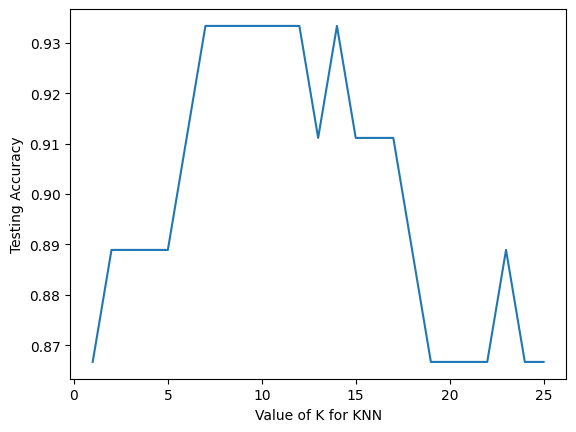

In [32]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

From this graph we can see that from 8-13 (approx.) will be the most accurate value of 'k'. So we use a number from that range for the value of 'n_neighbors' in:

`from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_std, y_train)`

This increases the accuracy from 88.9% (when n_neighbors = 5) to 93.33% (when n_neighbors = 10)

# K-Means Clustering

Since unsupervised learning has no labels, we do not use `x_train`, `x_test`, `y_train`, `y_test`. We use the entire dataset `x` for training. Here, we do not know how many clusters are there (i.e., we do not know what is `y`).

Text(0, 0.5, 'Petal Width')

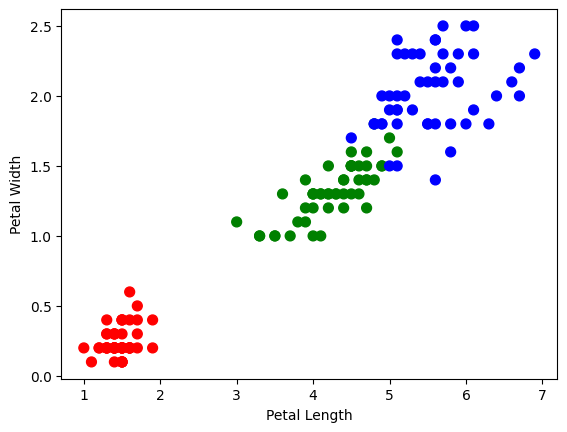

In [37]:
colormap = np.array(['red', 'green', 'blue'])
plt.scatter(iris['petal_length'], iris['petal_width'], c=colormap[y], s=50)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [44]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=2, n_init=4) #By setting a random_state, you ensure that the random initialization of the centroids is reproducible, which is important for consistency and comparability of results. The  `n_jobs` or `n_init` parameter is used to specify the number of parallel jobs to run for the computation.
km.fit(x)

KMeans(n_clusters=3, n_init=4, random_state=2)

In [40]:
center = km.cluster_centers_
center

#In the context of K-means clustering, km.cluster_centers_ is an attribute of the fitted KMeans object that stores the coordinates of the cluster centers (centroids) found by the algorithm.

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.00408163, 3.41632653, 1.46530612, 0.24489796],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [41]:
km.labels_
#km.labels_ is an array where each element is the cluster index (an integer) to which the corresponding data point is assigned.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [61]:
Category = ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'] #Setting manually according to the above array (only approximation as 0 = Iris-setosa, 1 = Iris-versicolor, 2 = Iris-virginica)

Text(0, 0.5, 'Petal Width (cm)')

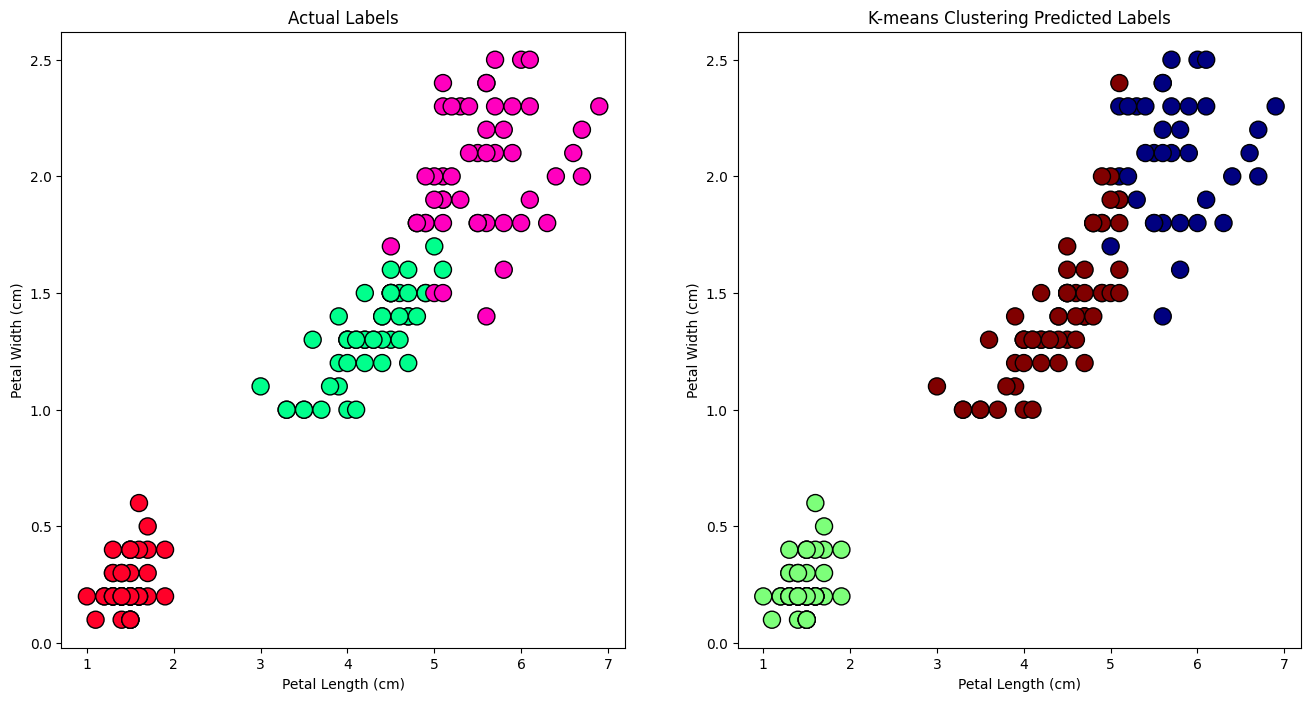

In [62]:
new_label = km.labels_
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
colormap = np.array(['red', 'green', 'blue'])

# Plot the actual labels
axes[0].scatter(x[:, 2], x[:, 3], c=y, cmap='gist_rainbow', edgecolor='k', s=150)
axes[0].set_title('Actual Labels')
axes[0].set_xlabel('Petal Length (cm)')
axes[0].set_ylabel('Petal Width (cm)')

# Plot the predicted labels
axes[1].scatter(x[:, 2], x[:, 3], c=new_label, cmap='jet', edgecolor='k', s=150)
axes[1].set_title('K-means Clustering Predicted Labels')
axes[1].set_xlabel('Petal Length (cm)')
axes[1].set_ylabel('Petal Width (cm)')

Predicting on custom input

In [66]:
x_km = np.array([7.1, 3, 5.9, 2.1])
x_km_prediction = km.predict(x_km.reshape(1, -1))
x_km_prediction[0]
print(f'The species of the flower is {Category[x_km_prediction[0]]}')

The species of the flower is Iris-versicolor
